In [5]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mode
%matplotlib inline  

import os
import matplotlib.image as mpimg

In [6]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [7]:
thesis_embeddings = pd.read_csv('thesis_face_embeddings/guess_who_embeddings_pandas.csv')

emb = thesis_embeddings.encodings

emb = (emb
 .str.replace('\n','')
 .str.replace('\r','')
 .str.replace('[','')
 .str.replace(']','')
 .str.split())

emb_lists = emb.tolist()

thesis_emb = np.asarray(emb_lists)

thesis_emb = thesis_emb.astype(np.float)

In [8]:
X_test = thesis_emb 

In [9]:
df = pd.read_csv('csv/thesis_faces_ground_truth.csv')

In [10]:
df.columns

Index(['Unnamed: 0', 'faceID', 'face_perceived_physical-description',
       'face_perceived_ethnicity', 'face_perceived_ethnicity-details',
       'face_perceived_eye', 'face_perceived_hair',
       'face_perceived_photo-gender', 'uniqueID', 'face_gender_mode',
       'face_gender_consensus', 'glasses_mentioned', 'glasses',
       'eye_consensus_prop', 'eye_perceived', 'nr_eye_col',
       'hair_consensus_prop', 'hair_perceived', 'nr_hair_col'],
      dtype='object')

In [11]:
gender_df = df[['faceID', 'face_gender_mode', 'face_gender_consensus']].sort_values('faceID').reset_index().drop(columns='index')
gender_df['male'] = np.where(gender_df['face_gender_mode']=='male', 1, 0)

In [12]:
y_test = gender_df.male.values

In [13]:
gender_keras_model = pickle.load(open('celeba/gender_keras_model.sav', 'rb'))

C:\Users\Paradigit\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [14]:
y_prob = gender_keras_model.predict(X_test)
y_pred = (y_prob > 0.5)

In [13]:

print("{:.3}".format(accuracy_score(y_test, y_pred)))

print(classification_report(y_test,y_pred))

print(confusion_matrix(y_test,y_pred))

0.959
             precision    recall  f1-score   support

          0       1.00      0.91      0.96        94
          1       0.93      1.00      0.96        99

avg / total       0.96      0.96      0.96       193

[[86  8]
 [ 0 99]]


In [41]:
tresholds = np.linspace(0,1,20)
acc_list = []

for treshold in tresholds:
    y_pred = (y_prob > treshold)
    print(treshold)
    print("{:.3}".format(accuracy_score(y_test, y_pred)))
    print(confusion_matrix(y_test,y_pred))
    print()
    acc_list.append(accuracy_score(y_test, y_pred))
    
print(acc_list)

0.0


ValueError: Found input variables with inconsistent numbers of samples: [97, 193]

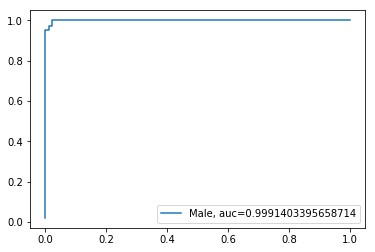

In [13]:

fpr, tpr, _ = roc_curve(y_test,  y_prob)
auc = roc_auc_score(y_test, y_prob)
plt.plot(fpr,tpr,label="Male, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [36]:
from sklearn.model_selection import train_test_split

y = gender_df.male.values
X = gender_df.pred_prob_male.values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.50, random_state=91)

In [33]:
X_train

array([0.79194814, 0.0279674 , 0.09446161, 0.99995327, 0.9997485 ,
       0.02488525, 0.99612135, 0.10673034, 0.99987674, 0.9999801 ,
       0.00707625, 0.99275243, 0.00431045, 0.20824213, 0.99923384,
       0.9999039 , 0.00501529, 0.99804   , 0.9999107 , 0.00891021,
       0.00940746, 0.9976935 , 0.32940486, 0.97183764, 0.02132357,
       0.9593821 , 0.00823602, 0.0115238 , 0.99996924, 0.9963731 ,
       0.9996847 , 0.99988735, 0.9984945 , 0.9974738 , 0.9999887 ,
       0.01784533, 0.997101  , 0.07578252, 0.9999944 , 0.03679056,
       0.00187353, 0.01502353, 0.9996208 , 0.01307236, 0.00130648,
       0.01323622, 0.9996159 , 0.99879575, 0.9905087 , 0.99593157,
       0.04435369, 0.06761573, 0.00662023, 0.14260486, 0.00788346,
       0.1368605 , 0.02170503, 0.9994911 , 0.2763744 , 0.9971686 ,
       0.9903852 , 0.9999999 , 0.03308554, 0.16630125, 0.03242374,
       0.01798908, 0.9999981 , 0.99995863, 0.9995684 , 0.36962688,
       0.99947613, 0.7401996 , 0.99976045, 0.9996791 , 0.99968

In [37]:
y_train

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0])

In [39]:

tresholds = np.linspace(0,1,20)
acc_list = []

for treshold in tresholds:
    y_pred = (X_train > treshold)
    print(treshold)
    print("{:.3}".format(accuracy_score(y_train, y_pred)))
    print(confusion_matrix(y_train,y_pred))
    print()
    acc_list.append(accuracy_score(y_train, y_pred))
    
print(acc_list)

0.0
0.51
[[ 0 47]
 [ 0 49]]

0.05263157894736842
0.802
[[28 19]
 [ 0 49]]

0.10526315789473684
0.833
[[31 16]
 [ 0 49]]

0.15789473684210525
0.865
[[34 13]
 [ 0 49]]

0.21052631578947367
0.885
[[36 11]
 [ 0 49]]

0.2631578947368421
0.906
[[38  9]
 [ 0 49]]

0.3157894736842105
0.927
[[40  7]
 [ 0 49]]

0.3684210526315789
0.948
[[42  5]
 [ 0 49]]

0.42105263157894735
0.958
[[43  4]
 [ 0 49]]

0.47368421052631576
0.958
[[43  4]
 [ 0 49]]

0.5263157894736842
0.958
[[43  4]
 [ 0 49]]

0.5789473684210527
0.958
[[43  4]
 [ 0 49]]

0.631578947368421
0.958
[[43  4]
 [ 0 49]]

0.6842105263157894
0.958
[[43  4]
 [ 0 49]]

0.7368421052631579
0.958
[[43  4]
 [ 0 49]]

0.7894736842105263
0.979
[[45  2]
 [ 0 49]]

0.8421052631578947
0.99
[[46  1]
 [ 0 49]]

0.894736842105263
0.99
[[46  1]
 [ 0 49]]

0.9473684210526315
0.99
[[46  1]
 [ 0 49]]

1.0
0.49
[[47  0]
 [49  0]]

[0.5104166666666666, 0.8020833333333334, 0.8333333333333334, 0.8645833333333334, 0.8854166666666666, 0.90625, 0.9270833333333334, 0

In [15]:
gender_df['pred_male'] = y_pred
gender_df['pred_prob_male'] = y_prob
gender_df['pred_prob_female'] = 1 - gender_df['pred_prob_male'] 

In [42]:
gender_df

,faceID,face_gender_mode,face_gender_consensus,male,pred_male,pred_prob_male,pred_prob_female
0,IMG_0003,female,1.000000,0,False,0.015024,9.849765e-01
1,IMG_0018,male,1.000000,1,False,0.996121,3.878653e-03
2,IMG_0033,male,1.000000,1,False,0.990509,9.491324e-03
3,IMG_0048,female,1.000000,0,False,0.013995,9.860049e-01
4,IMG_0063,male,0.846154,1,False,0.999911,8.904934e-05
5,IMG_0078,male,1.000000,1,False,0.998040,1.959980e-03
6,IMG_0093,male,1.000000,1,False,0.999887,1.126528e-04
7,IMG_0108,female,1.000000,0,False,0.027967,9.720326e-01
8,IMG_0123,male,1.000000,1,False,0.990385,9.614825e-03
9,IMG_0138,male,1.000000,1,False,0.999749,2.514720e-04


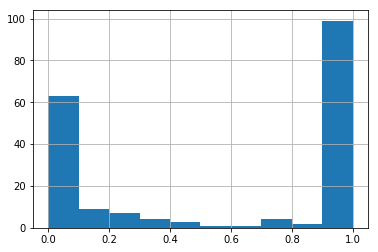

In [15]:
gender_df.pred_prob_male.hist()

C:\Users\Paradigit\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


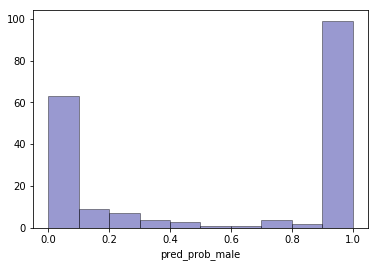

In [14]:
# 10 bins
# Density Plot and Histogram 
sns.distplot(gender_df.pred_prob_male, hist=True, kde=False, 
             bins=10, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

C:\Users\Paradigit\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Paradigit\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


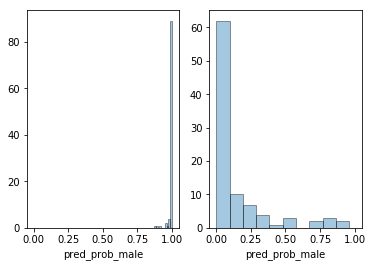

In [42]:
# plot
f, axes = plt.subplots(1, 2, sharex=True)

male_prediction = gender_df[gender_df.face_gender_mode == 'male']
female_prediction = gender_df[gender_df.face_gender_mode == 'female']

sns.distplot(male_prediction.pred_prob_male, hist=True, kde=False, 
             bins=10,  
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, ax=axes[0]
             )

sns.distplot(female_prediction.pred_prob_male, hist=True, kde=False, 
             bins=10,  
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, ax=axes[1])

In [19]:
gender_df.head(2)

,faceID,face_gender_mode,face_gender_consensus,male,pred_male,pred_prob_male
0,IMG_0003,female,1.0,0,False,0.015024
1,IMG_0018,male,1.0,1,True,0.996121


C:\Users\Paradigit\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Paradigit\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


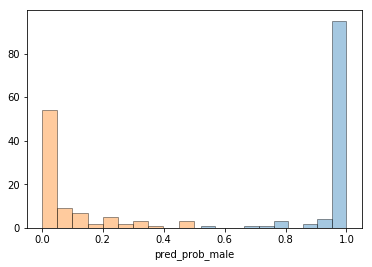

In [27]:
#gender_df.pred_prob_male

male_prediction = gender_df[gender_df.pred_prob_male >= 0.5]
female_prediction = gender_df[gender_df.pred_prob_male < 0.5]

sns.distplot(male_prediction.pred_prob_male, hist=True, kde=False, 
             bins=10,  
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(female_prediction.pred_prob_male, hist=True, kde=False, 
             bins=10,  
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.show()

C:\Users\Paradigit\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Paradigit\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


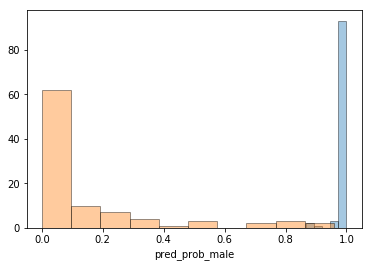

In [30]:
#gender_df.pred_prob_male

male_prediction = gender_df[gender_df.face_gender_mode == 'male']
female_prediction = gender_df[gender_df.face_gender_mode == 'female']

sns.distplot(male_prediction.pred_prob_male, hist=True, kde=False, 
             bins=5,  
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(female_prediction.pred_prob_male, hist=True, kde=False, 
             bins=10,  
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.show()

C:\Users\Paradigit\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Paradigit\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


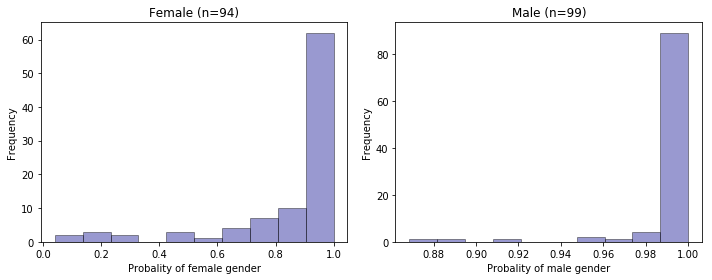

In [18]:
f, (ax1, ax2) = plt.subplots(1,2,  figsize=(10, 4))




sns.distplot(1 -gender_df[gender_df.face_gender_mode == 'female'].pred_prob_male, hist=True, kde=False, 
             bins=10, color = 'darkblue', ax=ax1,
             hist_kws={'edgecolor':'black'}).set(ylabel='Frequency', xlabel='Probality of female gender', title='Female (n=94)')

sns.distplot(gender_df[gender_df.face_gender_mode == 'male'].pred_prob_male, hist=True, kde=False, 
             bins=10, color = 'darkblue', ax=ax2,
             hist_kws={'edgecolor':'black'}).set(ylabel='Frequency', xlabel='Probality of male gender', title='Male (n=99)')

plt.tight_layout()

In [16]:
def confusion(row):
    if row.male == 0:
        if row.pred_male == 0:
            
            return 'true_female'
        if row.pred_male == 1:
            return 'false_male'
    
    if row.male == 1:
        if row.pred_male == 0:
            return 'false_female'
        if row.pred_male == 1:
            return 'true_male'


In [17]:
gender_df['confusion'] = gender_df.apply(confusion, axis=1)

In [17]:
gender_df.confusion.value_counts()

true_male      99
true_female    86
false_male      8
Name: confusion, dtype: int64

In [18]:
female = gender_df[gender_df.face_gender_mode == 'female']

In [22]:
tm_m = gender_df[gender_df.confusion == 'true_male']['pred_prob_male'].mean()
tm_std = gender_df[gender_df.confusion == 'true_male']['pred_prob_male'].std()

m_m = gender_df[gender_df.male == 1]['pred_prob_male'].mean()
m_std = gender_df[gender_df.male == 1]['pred_prob_male'].std()

tf_m = 1 - gender_df[gender_df.confusion == 'true_female']['pred_prob_male'].mean()
tf_std = gender_df[gender_df.confusion == 'true_female']['pred_prob_male'].std()

f_m = 1 - gender_df[gender_df.male == 0]['pred_prob_male'].mean()
f_std = gender_df[gender_df.male == 0]['pred_prob_male'].std()

print('True male Mean Probability:',tm_m)
print('True male std Probability:',tm_std)
print()
print('True female Mean Probability:',tf_m)
print('True female std Probability:',tf_std)
print()
print('predicted male Mean Probability:',m_m)
print('predicted male std Probability:',m_std)
print()
print('predicted female Mean Probability:',f_m)
print('predicted female std Probability:',f_std)

True male Mean Probability: 0.9935171008110046
True male std Probability: 0.020342523232102394

True female Mean Probability: 0.915525034070015
True female std Probability: 0.11748094111680984

predicted male Mean Probability: 0.9935171008110046
predicted male std Probability: 0.020342523232102394

predicted female Mean Probability: 0.8566519618034363
predicted female std Probability: 0.22744432091712952


In [24]:

from scipy import stats

In [29]:
stats.shapiro(gender_df[gender_df.male == 1]['pred_prob_male'])

(0.34616225957870483, 5.47729223130563e-19)

In [31]:
#welch test difference of mean
stats.ttest_ind(gender_df[gender_df.male == 1]['pred_prob_male'], 1 - gender_df[gender_df.male == 0]['pred_prob_male'], equal_var = False)

Ttest_indResult(statistic=5.812173591142888, pvalue=8.323250475651913e-08)

In [32]:
stats.kruskal(gender_df[gender_df.male == 1]['pred_prob_male'], 1 - gender_df[gender_df.male == 0]['pred_prob_male'])

KruskalResult(statistic=102.97386408562026, pvalue=3.395989661806312e-24)

In [44]:
gender_df.sort_values('face_gender_consensus').head()

,faceID,face_gender_mode,face_gender_consensus,male,pred_male,pred_prob_male,confusion,pred_prob_female
142,IMG_9228,female,0.555556,0,False,0.369627,true_female,0.630373
78,IMG_7912,female,0.736842,0,False,0.032424,true_female,0.967576
15,IMG_0230,female,0.769231,0,False,0.156488,true_female,0.843512
92,IMG_8138,male,0.812500,1,True,0.999559,true_male,0.000441
154,IMG_9409,female,0.833333,0,False,0.498993,true_female,0.501007


In [20]:
gender_df[gender_df.confusion == 'false_male']

,faceID,face_gender_mode,face_gender_consensus,male,pred_male,pred_prob_male,confusion
11,IMG_0169,female,1.000,0,True,0.521481,false_male
17,IMG_0295,female,0.875,0,True,0.791948,false_male
116,IMG_8697,female,1.000,0,True,0.769699,false_male
125,IMG_8934,female,1.000,0,True,0.786040,false_male
165,IMG_9574,female,1.000,0,True,0.959382,false_male
177,IMG_9755,female,1.000,0,True,0.695397,false_male
191,IMG_9977,female,1.000,0,True,0.945725,false_male
192,IMG_9987,female,1.000,0,True,0.740200,false_male


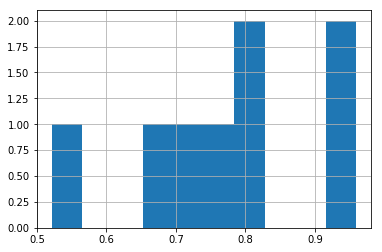

In [26]:
gender_df[gender_df.confusion == 'false_male'].pred_prob_male.hist()

C:\Users\Paradigit\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


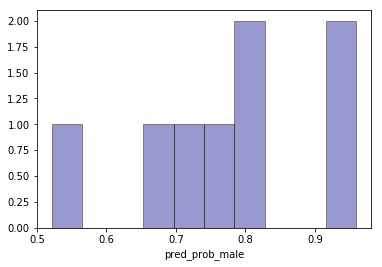

In [101]:
# 10 bins
# Density Plot and Histogram 
sns.distplot(gender_df[gender_df.confusion == 'false_male'].pred_prob_male, hist=True, kde=False, 
             bins=10, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
#plt.xticks([0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

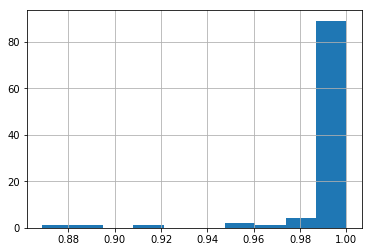

In [39]:
#True Male
gender_df[gender_df.confusion == 'true_male'].pred_prob_male.hist()

C:\Users\Paradigit\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


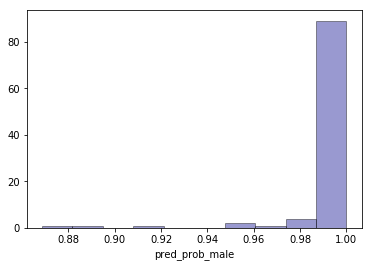

In [43]:
# 10 bins
# Density Plot and Histogram 
sns.distplot(gender_df[gender_df.face_gender_mode == 'male'].pred_prob_male, hist=True, kde=False, 
             bins=10, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

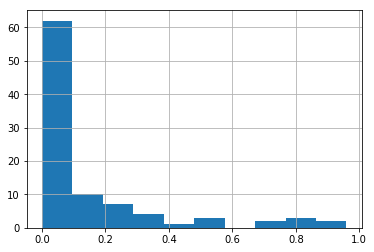

In [51]:
#True Female
gender_df[gender_df.confusion == 'true_female'].pred_prob_male.hist()

C:\Users\Paradigit\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


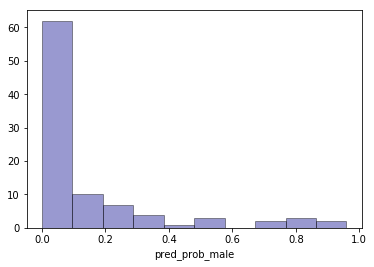

In [44]:
# 10 bins
# Density Plot and Histogram 
sns.distplot(gender_df[gender_df.face_gender_mode == 'female'].pred_prob_male, hist=True, kde=False, 
             bins=10, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [19]:
import os
import matplotlib.image as mpimg

In [20]:
img_dir = 'small_correct-images/'
imglist = os.listdir(img_dir)

In [76]:
imglist

['IMG_0003.JPG',
 'IMG_0018.JPG',
 'IMG_0033.JPG',
 'IMG_0048.JPG',
 'IMG_0063.JPG',
 'IMG_0078.JPG',
 'IMG_0093.JPG',
 'IMG_0108.JPG',
 'IMG_0123.JPG',
 'IMG_0138.JPG',
 'IMG_0153.JPG',
 'IMG_0169.JPG',
 'IMG_0184.JPG',
 'IMG_0199.JPG',
 'IMG_0214.JPG',
 'IMG_0230.JPG',
 'IMG_0245.JPG',
 'IMG_0295.JPG',
 'IMG_0310.JPG',
 'IMG_0325.JPG',
 'IMG_0341.JPG',
 'IMG_0356.JPG',
 'IMG_0371.JPG',
 'IMG_0386.JPG',
 'IMG_0401.JPG',
 'IMG_0416.JPG',
 'IMG_0431.JPG',
 'IMG_0446.JPG',
 'IMG_0461.JPG',
 'IMG_0476.JPG',
 'IMG_0491.JPG',
 'IMG_0506.JPG',
 'IMG_0521.JPG',
 'IMG_0536.JPG',
 'IMG_0551.JPG',
 'IMG_0566.JPG',
 'IMG_0581.JPG',
 'IMG_0596.JPG',
 'IMG_0611.JPG',
 'IMG_0626.JPG',
 'IMG_0641.JPG',
 'IMG_0656.JPG',
 'IMG_0671.JPG',
 'IMG_0686.JPG',
 'IMG_0701.JPG',
 'IMG_0716.JPG',
 'IMG_0731.JPG',
 'IMG_0746.JPG',
 'IMG_0761.JPG',
 'IMG_0777.JPG',
 'IMG_0793.JPG',
 'IMG_7502.JPG',
 'IMG_7517.JPG',
 'IMG_7532.JPG',
 'IMG_7547.JPG',
 'IMG_7562.JPG',
 'IMG_7578.JPG',
 'IMG_7593.JPG',
 'IMG_7608.JPG

In [21]:
false_males = gender_df[gender_df.confusion == 'false_male'].faceID.values
false_males_prob = gender_df[gender_df.confusion == 'false_male'].pred_prob_male.values

In [89]:
false_males_prob

array([0.5214812 , 0.79194814, 0.76969934, 0.78604   , 0.9593821 ,
       0.6953966 , 0.94572484, 0.7401996 ], dtype=float32)

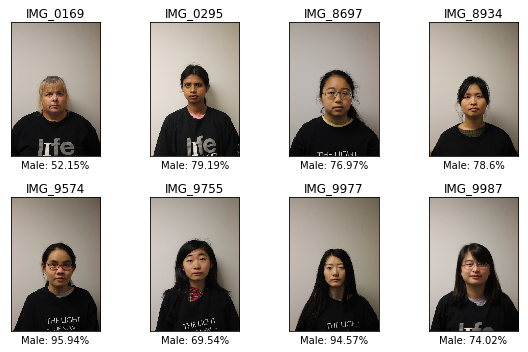

In [22]:
plt.figure(figsize=(8,5))
for i, face in enumerate(gender_df[gender_df.confusion == 'false_male'].faceID.values):
    
    plt.subplot(2,4,i+1).set_title(face)
    
    face = face + ".JPG"
    img=mpimg.imread(img_dir + face)
    imgplot = plt.imshow(img)
    
    #remove ticks for x and y axes
    plt.xticks([], [])
    plt.yticks([], [])
    
    #label probability male score
    plt.xlabel('Male: ' + str(round(false_males_prob[i] * 100,2)) + '%')

plt.tight_layout()
plt.show()

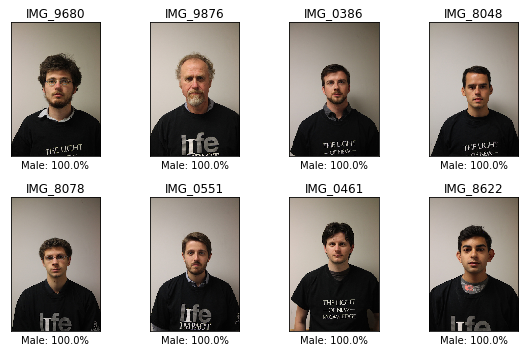

In [39]:
# 8  male classification by both human and model with highest prob scores
true_males = gender_df[gender_df.confusion == 'true_male'].sort_values('pred_prob_male', ascending=False).faceID.values
true_males_prob = gender_df[gender_df.confusion == 'true_male'].sort_values('pred_prob_male', ascending=False).pred_prob_male.values

plt.figure(figsize=(8,5))
for i, face in enumerate(true_males[:8]):
    
    plt.subplot(2,4,i+1).set_title(face)
    
    face = face + ".JPG"
    img=mpimg.imread(img_dir + face)
    imgplot = plt.imshow(img)
    
    #remove ticks for x and y axes
    plt.xticks([], [])
    plt.yticks([], [])
    
    #label probability male score
    plt.xlabel('Male: ' + str(round(true_males_prob[i] * 100,2)) + '%')

plt.tight_layout()
plt.show()

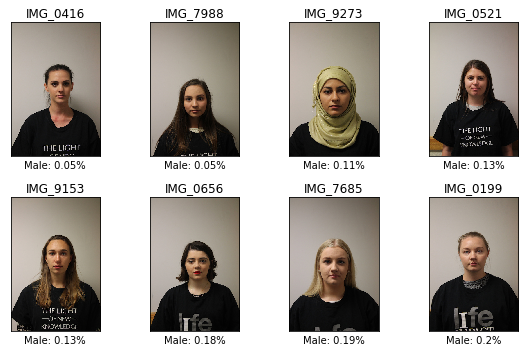

In [40]:
# 8  female classification by both human and model with lowest prob scores
true_females = gender_df[gender_df.confusion == 'true_female'].sort_values('pred_prob_male', ascending=True).faceID.values
true_females_prob = gender_df[gender_df.confusion == 'true_female'].sort_values('pred_prob_male', ascending=True).pred_prob_male.values

plt.figure(figsize=(8,5))
for i, face in enumerate(true_females[:8]):
    
    plt.subplot(2,4,i+1).set_title(face)
    
    face = face + ".JPG"
    img=mpimg.imread(img_dir + face)
    imgplot = plt.imshow(img)
    
    #remove ticks for x and y axes
    plt.xticks([], [])
    plt.yticks([], [])
    
    #label probability male score
    plt.xlabel('Male: ' + str(round(true_females_prob[i] * 100,2)) + '%')

plt.tight_layout()
plt.show()

In [38]:
gender_df[gender_df.confusion == 'true_female'].sort_values('pred_prob_male', ascending=True)

,faceID,face_gender_mode,face_gender_consensus,male,pred_male,pred_prob_male,pred_prob_female,confusion
25,IMG_0416,female,1.000000,0,False,0.000538,0.999462,true_female
82,IMG_7988,female,1.000000,0,False,0.000539,0.999461,true_female
145,IMG_9273,female,0.947368,0,False,0.001071,0.998929,true_female
32,IMG_0521,female,1.000000,0,False,0.001306,0.998694,true_female
137,IMG_9153,female,1.000000,0,False,0.001340,0.998660,true_female
41,IMG_0656,female,1.000000,0,False,0.001805,0.998195,true_female
63,IMG_7685,female,0.937500,0,False,0.001874,0.998126,true_female
13,IMG_0199,female,0.923077,0,False,0.001997,0.998003,true_female
100,IMG_8258,female,1.000000,0,False,0.003931,0.996069,true_female
183,IMG_9846,female,0.947368,0,False,0.004070,0.995930,true_female


In [ ]:
plt.figure(figsize=(8,5))
for i, face in enumerate(gender_df[gender_df.confusion == 'false_male'].faceID.values):
    
    plt.subplot(2,4,i+1).set_title(face)
    
    face = face + ".JPG"
    img=mpimg.imread(img_dir + face)
    imgplot = plt.imshow(img)
    
    #remove ticks for x and y axes
    plt.xticks([], [])
    plt.yticks([], [])
    
    #label probability male score
    plt.xlabel('Male: ' + str(round(false_males_prob[i] * 100,2)) + '%')

plt.tight_layout()
plt.show()

In [48]:
plt.figure(figsize=(8,5))
for i, face in enumerate(gender_df[gender_df.confusion == 'false_male'].faceID.values):
    
    plt.subplot(2,4,i+1).set_title(face)
    
    face = face + ".JPG"
    img=mpimg.imread(img_dir + face)
    imgplot = plt.imshow(img)
    
    #remove ticks for x and y axes
    plt.xticks([], [])
    plt.yticks([], [])
    
    #label probability male score
    plt.xlabel('Male: ' + str(round(false_males_prob[i] * 100,2)) + '%')

plt.tight_layout()
plt.show()

<Figure size 576x360 with 0 Axes>

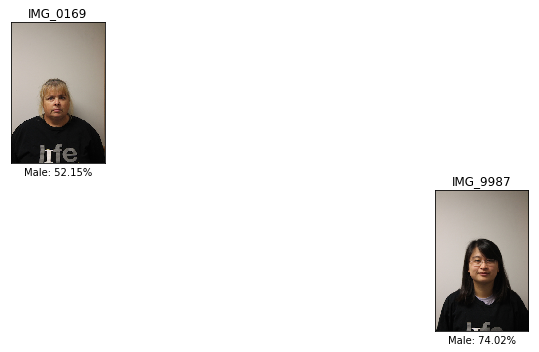

In [24]:
plt.figure(figsize=(8,5))
for i, face in enumerate(gender_df[gender_df.confusion == 'false_male'].faceID.values):
    if i == 0 or i == 7:
        plt.subplot(2,4,i+1).set_title(face)

        face = face + ".JPG"
        img=mpimg.imread(img_dir + face)
        imgplot = plt.imshow(img)

        #remove ticks for x and y axes
        plt.xticks([], [])
        plt.yticks([], [])

        #label probability male score
        plt.xlabel('Male: ' + str(round(false_males_prob[i] * 100,2)) + '%')

plt.tight_layout()
plt.show()

In [28]:
gender_df.sort_values('face_gender_consensus')

,faceID,face_gender_mode,face_gender_consensus,male,pred_male,pred_prob_male,confusion
142,IMG_9228,female,0.555556,0,False,0.369627,true_female
78,IMG_7912,female,0.736842,0,False,0.032424,true_female
15,IMG_0230,female,0.769231,0,False,0.156488,true_female
92,IMG_8138,male,0.812500,1,True,0.999559,true_male
154,IMG_9409,female,0.833333,0,False,0.498993,true_female
4,IMG_0063,male,0.846154,1,True,0.999911,true_male
115,IMG_8682,female,0.857143,0,False,0.008236,true_female
122,IMG_8889,female,0.875000,0,False,0.120697,true_female
17,IMG_0295,female,0.875000,0,True,0.791948,false_male
188,IMG_9921,female,0.882353,0,False,0.099489,true_female
